In [34]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [37]:
def drawCompleteMetrics(df, axes, clouds=True, label=None, x_axis='d'):
    gb_df = df.groupby(x_axis)
    agg_df = gb_df.mean()
    q25_df = gb_df.quantile(0.25)
    q75_df = gb_df.quantile(0.75)
    eps = agg_df.index
    
    axes[0, 0].plot(eps, agg_df['tnr'], label=label)
    axes[0, 0].fill_between(eps, q25_df['tnr'], q75_df['tnr'], alpha=0.2)
    axes[0, 0].set_title('TNR')
    axes[0, 0].set_ylim(-0.01, 1.01)
    
    axes[0, 1].plot(eps, agg_df['fomr'], label=label)
    axes[0, 1].fill_between(eps, q25_df['fomr'], q75_df['fomr'], alpha=0.2)
    axes[0, 1].set_title('FOR')
    axes[0, 1].set_ylim(-0.01, 1.01)
    
    axes[1, 0].plot(eps, agg_df['fdr'], label=label)
    axes[1, 0].fill_between(eps, q25_df['fdr'], q75_df['fdr'], alpha=0.2)
    axes[1, 0].set_title('FDR')
    axes[1, 0].set_ylim(-0.01, 1.01)
    
    axes[1, 1].plot(eps, agg_df['tpr'], label=label)
    axes[1, 1].fill_between(eps, q25_df['tpr'], q75_df['tpr'], alpha=0.2)
    axes[1, 1].set_title('TPR')
    axes[1, 1].set_ylim(-0.01, 1.01)

def drawGeneralMetrics(df, axes, clouds=True, label=None, x_axis='d'):
    gb_df = df.groupby(x_axis)
    agg_df = gb_df.mean()
    q25_df = gb_df.quantile(0.25)
    q75_df = gb_df.quantile(0.75)
    eps = agg_df.index
    
    axes[0].plot(eps, agg_df['ba'], label=label)
    axes[0].fill_between(eps, q25_df['ba'], q75_df['ba'], alpha=0.2)
    axes[0].set_title('BA')
    axes[0].set_ylim(-0.01, 1.01)
    
    axes[1].plot(eps, agg_df['f1'], label=label)
    axes[1].fill_between(eps, q25_df['f1'], q75_df['f1'], alpha=0.2)
    axes[1].set_title('F1')
    axes[1].set_ylim(-0.01, 1.01)
    
    axes[2].plot(eps, agg_df['mcc'], label=label)
    axes[2].fill_between(eps, q25_df['mcc'], q75_df['mcc'], alpha=0.2)
    axes[2].set_title('MCC')
    axes[2].set_ylim(-0.01, 1.01)

## Draw one way on one plot

In [7]:
experiment_dir = '../data/aggregated/identityPrecisions_N20_n1000_way0.csv'

In [8]:
df = pd.read_csv(experiment_dir)

way = 0
print(f'Using way {way}')
df = df[df['way'] == way]
df.head()

Using way 0


,tn,fp,fn,tp,fdr,fomr,tpr,tnr,ba,f1,mcc,way,d
0,168,0,19,3,0.0,0.101604,0.136364,1.0,0.568182,0.24,0.350012,0,0.1
2,168,0,19,3,0.0,0.101604,0.136364,1.0,0.568182,0.24,0.350012,0,0.1
4,168,0,19,3,0.0,0.101604,0.136364,1.0,0.568182,0.24,0.350012,0,0.1
6,168,0,19,3,0.0,0.101604,0.136364,1.0,0.568182,0.24,0.350012,0,0.1
8,168,0,19,3,0.0,0.101604,0.136364,1.0,0.568182,0.24,0.350012,0,0.1


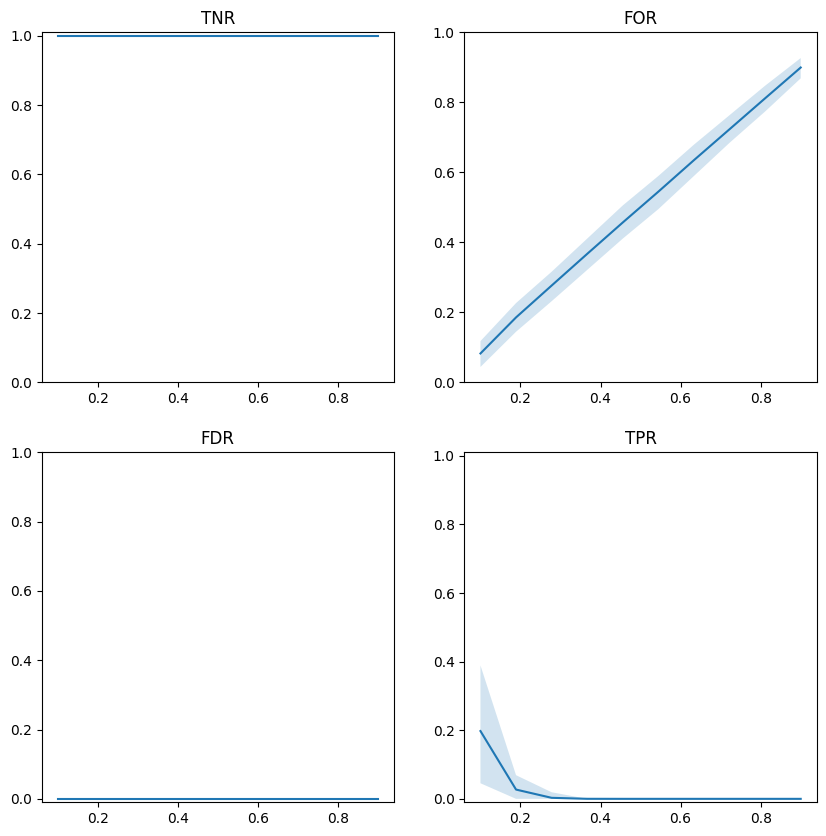

In [9]:
fig, axes = plt.subplots(2, 2)
gb_df = df.groupby('d')
agg_df = gb_df.mean()
q25_df = gb_df.quantile(0.1)
q75_df = gb_df.quantile(0.9)
eps = agg_df.index

axes[0, 0].plot(eps, agg_df['tnr'])
axes[0, 0].fill_between(eps, q25_df['tnr'], q75_df['tnr'], alpha=0.2)
axes[0, 0].set_title('TNR')
axes[0, 0].set_ylim(0, 1.01)

axes[0, 1].plot(eps, agg_df['fomr'])
axes[0, 1].fill_between(eps, q25_df['fomr'], q75_df['fomr'], alpha=0.2)
axes[0, 1].set_title('FOR')
axes[0, 1].set_ylim(0, 1)

axes[1, 0].plot(eps, agg_df['fdr'])
axes[1, 0].fill_between(eps, q25_df['fdr'], q75_df['fdr'], alpha=0.2)
axes[1, 0].set_title('FDR')
axes[1, 0].set_ylim(-0.01, 1)

axes[1, 1].plot(eps, agg_df['tpr'])
axes[1, 1].fill_between(eps, q25_df['tpr'], q75_df['tpr'], alpha=0.2)
axes[1, 1].set_title('TPR')
axes[1, 1].set_ylim(-0.01, 1.01)

fig.set_size_inches(10, 10)

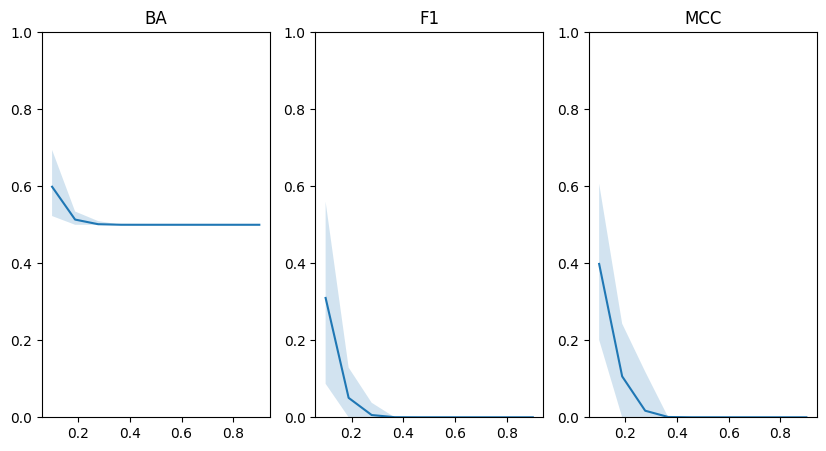

In [10]:
fig, axes = plt.subplots(1, 3)
gb_df = df.groupby('d')
agg_df = gb_df.mean()
q25_df = gb_df.quantile(0.1)
q75_df = gb_df.quantile(0.9)
eps = agg_df.index

axes[0].plot(eps, agg_df['ba'])
axes[0].fill_between(eps, q25_df['ba'], q75_df['ba'], alpha=0.2)
axes[0].set_title('BA')
axes[0].set_ylim(0, 1)

axes[1].plot(eps, agg_df['f1'])
axes[1].fill_between(eps, q25_df['f1'], q75_df['f1'], alpha=0.2)
axes[1].set_title('F1')
axes[1].set_ylim(0, 1)

axes[2].plot(eps, agg_df['mcc'])
axes[2].fill_between(eps, q25_df['mcc'], q75_df['mcc'], alpha=0.2)
axes[2].set_title('MCC')
axes[2].set_ylim(0, 1)

fig.set_size_inches(10, 5)

## Draw two ways on one plot

In [36]:
def drawCompleteMetrics(df, axes, clouds=True, label=None, x_axis='d'):
    gb_df = df.groupby(x_axis)
    agg_df = gb_df.mean()
    q25_df = gb_df.quantile(0.25)
    q75_df = gb_df.quantile(0.75)
    eps = agg_df.index
    
    axes[0, 0].plot(eps, agg_df['tnr'], label=label)
    axes[0, 0].fill_between(eps, q25_df['tnr'], q75_df['tnr'], alpha=0.2)
    axes[0, 0].set_title('TNR')
    axes[0, 0].set_ylim(-0.01, 1.01)
    
    axes[0, 1].plot(eps, agg_df['fomr'], label=label)
    axes[0, 1].fill_between(eps, q25_df['fomr'], q75_df['fomr'], alpha=0.2)
    axes[0, 1].set_title('FOR')
    axes[0, 1].set_ylim(-0.01, 1.01)
    
    axes[1, 0].plot(eps, agg_df['fdr'], label=label)
    axes[1, 0].fill_between(eps, q25_df['fdr'], q75_df['fdr'], alpha=0.2)
    axes[1, 0].set_title('FDR')
    axes[1, 0].set_ylim(-0.01, 1.01)
    
    axes[1, 1].plot(eps, agg_df['tpr'], label=label)
    axes[1, 1].fill_between(eps, q25_df['tpr'], q75_df['tpr'], alpha=0.2)
    axes[1, 1].set_title('TPR')
    axes[1, 1].set_ylim(-0.01, 1.01)

def drawGeneralMetrics(df, axes, clouds=True, label=None, x_axis='d'):
    gb_df = df.groupby(x_axis)
    agg_df = gb_df.mean()
    q25_df = gb_df.quantile(0.25)
    q75_df = gb_df.quantile(0.75)
    eps = agg_df.index
    
    axes[0].plot(eps, agg_df['ba'], label=label)
    axes[0].fill_between(eps, q25_df['ba'], q75_df['ba'], alpha=0.2)
    axes[0].set_title('BA')
    axes[0].set_ylim(-0.01, 1.01)
    
    axes[1].plot(eps, agg_df['f1'], label=label)
    axes[1].fill_between(eps, q25_df['f1'], q75_df['f1'], alpha=0.2)
    axes[1].set_title('F1')
    axes[1].set_ylim(-0.01, 1.01)
    
    axes[2].plot(eps, agg_df['mcc'], label=label)
    axes[2].fill_between(eps, q25_df['mcc'], q75_df['mcc'], alpha=0.2)
    axes[2].set_title('MCC')
    axes[2].set_ylim(-0.01, 1.01)

In [30]:
experiment_dir = '../data/aggregated/StudentRobustness_N20_n1000.csv'
df = pd.read_csv(experiment_dir)
df.head()

,tn,fp,fn,tp,fdr,fomr,tpr,tnr,ba,f1,mcc,way,eps
0,175,0,12,3,0.0,0.064171,0.2,1.0,0.6,0.333333,0.432627,0,0.0
1,168,0,22,0,0.0,0.115789,0.0,1.0,0.5,0.000000,0.000000,1,0.0
2,175,0,12,3,0.0,0.064171,0.2,1.0,0.6,0.333333,0.432627,0,0.0
3,168,0,22,0,0.0,0.115789,0.0,1.0,0.5,0.000000,0.000000,1,0.0
4,175,0,12,3,0.0,0.064171,0.2,1.0,0.6,0.333333,0.432627,0,0.0


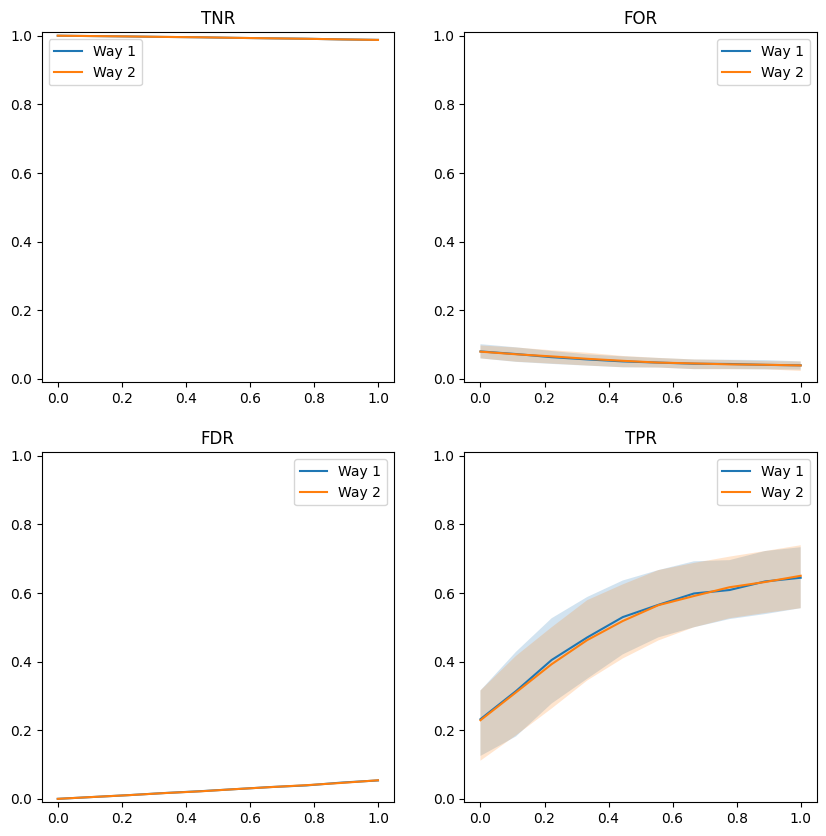

In [31]:
fig, axes = plt.subplots(2, 2)

way0_df = df[df.way == 0]
drawCompleteMetrics(way0_df, axes, label='Way 1', x_axis='eps')

way1_df = df[df.way == 1]
drawCompleteMetrics(way1_df, axes, label='Way 2', x_axis='eps')

for ax in axes.flatten(): ax.legend()

fig.set_size_inches(10, 10)

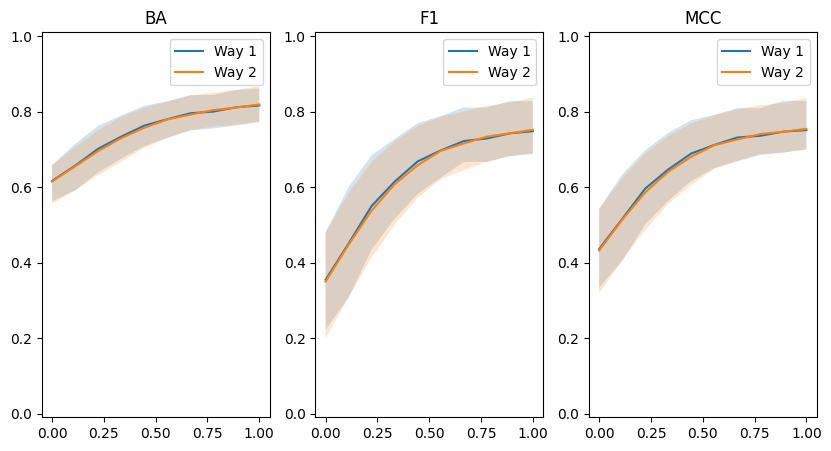

In [32]:
fig, axes = plt.subplots(1, 3)

way0_df = df[df.way == 0]
drawGeneralMetrics(way0_df, axes, label='Way 1', x_axis='eps')

way1_df = df[df.way == 1]
drawGeneralMetrics(way1_df, axes, label='Way 2', x_axis='eps')

for ax in axes.flatten(): ax.legend()

fig.set_size_inches(10, 5)

## Experiment 2.1 & 2.2 on one plot

In [48]:
experiment_dir = '../data/aggregated/identityPrecisions_N20_n1000_way0.csv'
df_1 = pd.read_csv(experiment_dir)
df_1.head()

,tn,fp,fn,tp,fdr,fomr,tpr,tnr,ba,f1,mcc,way,d
0,168,0,19,3,0.0,0.101604,0.136364,1.0,0.568182,0.24,0.350012,0,0.1
1,190,0,0,0,0.0,0.000000,1.000000,1.0,1.000000,1.00,0.000000,1,0.1
2,168,0,19,3,0.0,0.101604,0.136364,1.0,0.568182,0.24,0.350012,0,0.1
3,190,0,0,0,0.0,0.000000,1.000000,1.0,1.000000,1.00,0.000000,1,0.1
4,168,0,19,3,0.0,0.101604,0.136364,1.0,0.568182,0.24,0.350012,0,0.1


In [49]:
experiment_dir = '../data/aggregated/identityPrecisions_N20_n1000_way1.csv'
df_2 = pd.read_csv(experiment_dir)
df_2.head()

,tn,fp,fn,tp,fdr,fomr,tpr,tnr,ba,f1,mcc,way,d
0,190,0,0,0,0.0,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0,0.1
1,171,0,15,4,0.0,0.080645,0.210526,1.0,0.605263,0.347826,0.439941,1,0.1
2,190,0,0,0,0.0,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0,0.1
3,171,0,15,4,0.0,0.080645,0.210526,1.0,0.605263,0.347826,0.439941,1,0.1
4,190,0,0,0,0.0,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0,0.1


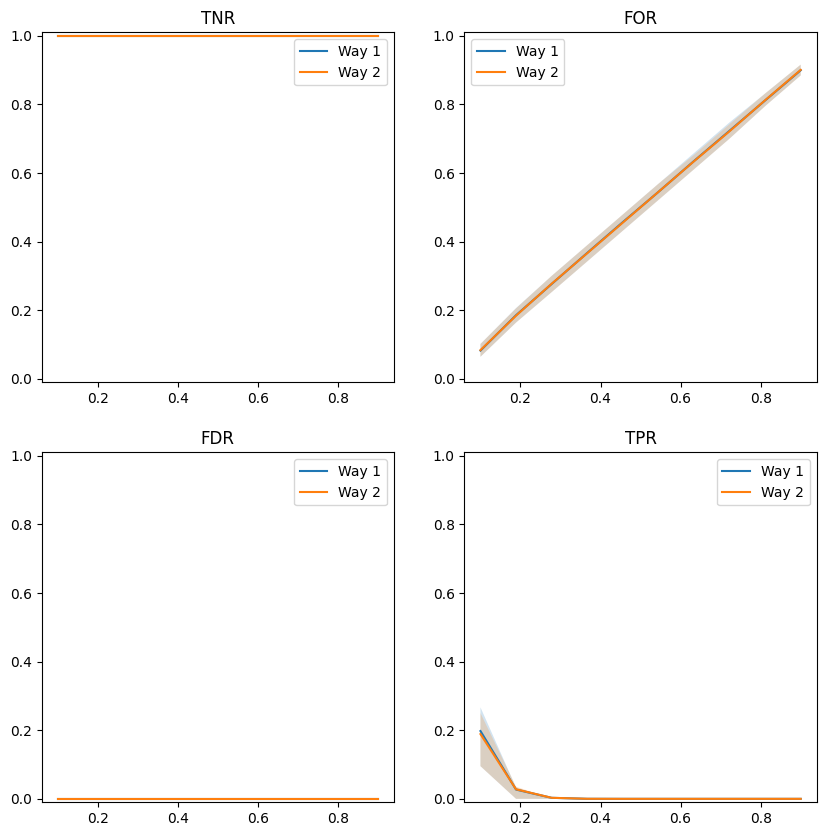

In [50]:
fig, axes = plt.subplots(2, 2)

df_1 = df_1[df_1.way == 0]
drawCompleteMetrics(df_1, axes, label='Way 1', x_axis='d')

df_2 = df_2[df_2.way == 1]
drawCompleteMetrics(df_2, axes, label='Way 2', x_axis='d')

for ax in axes.flatten(): ax.legend()

fig.set_size_inches(10, 10)

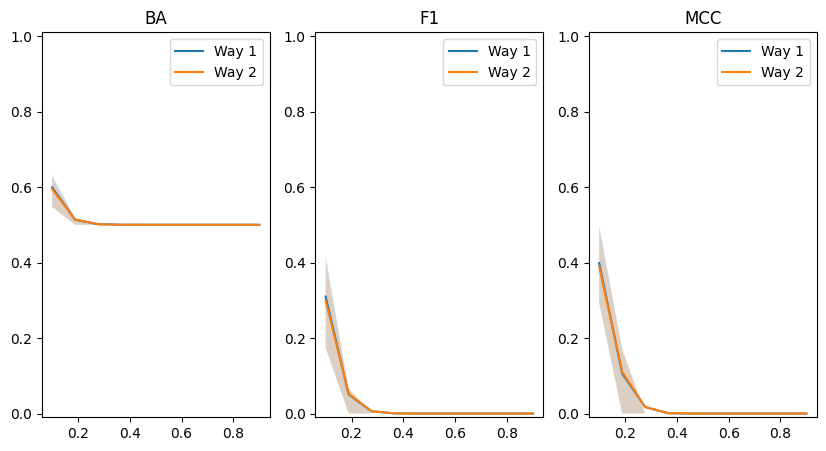

In [51]:
fig, axes = plt.subplots(1, 3)

df_1 = df_1[df_1.way == 0]
drawGeneralMetrics(df_1, axes, label='Way 1', x_axis='d')

df_2 = df_2[df_2.way == 1]
drawGeneralMetrics(df_2, axes, label='Way 2', x_axis='d')

for ax in axes.flatten(): ax.legend()

fig.set_size_inches(10, 5)

## Draw experiment 2.1, 2.2 & vector variant

In [57]:
experiment_dir = '../data/aggregated/identityPrecisions_N20_n100_way0.csv'
df_way0 = pd.read_csv(experiment_dir)

experiment_dir = '../data/aggregated/identityPrecisions_N20_n100_way1.csv'
df_way1 = pd.read_csv(experiment_dir)

experiment_dir = '../data/aggregated/vector_N20_n100.csv'
df_vec = pd.read_csv(experiment_dir)

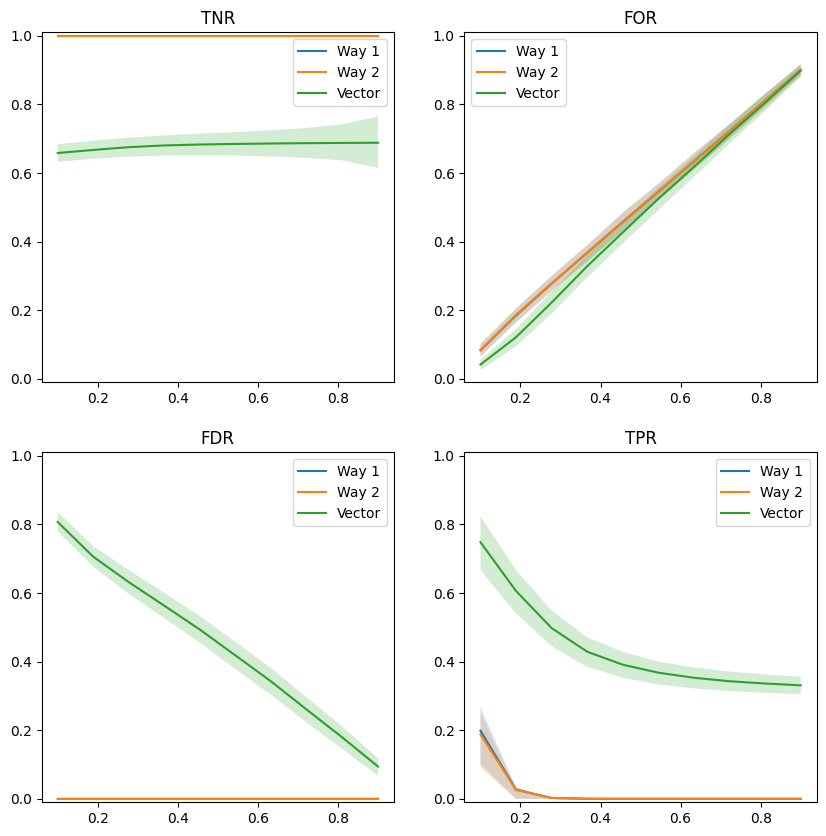

In [58]:
fig, axes = plt.subplots(2, 2)

drawCompleteMetrics(df_way0[df_way0.way == 0], axes, label='Way 1', x_axis='d')
drawCompleteMetrics(df_way1[df_way1.way == 1], axes, label='Way 2', x_axis='d')
drawCompleteMetrics(df_vec, axes, label='Vector', x_axis='d')

for ax in axes.flatten(): ax.legend()

fig.set_size_inches(10, 10)

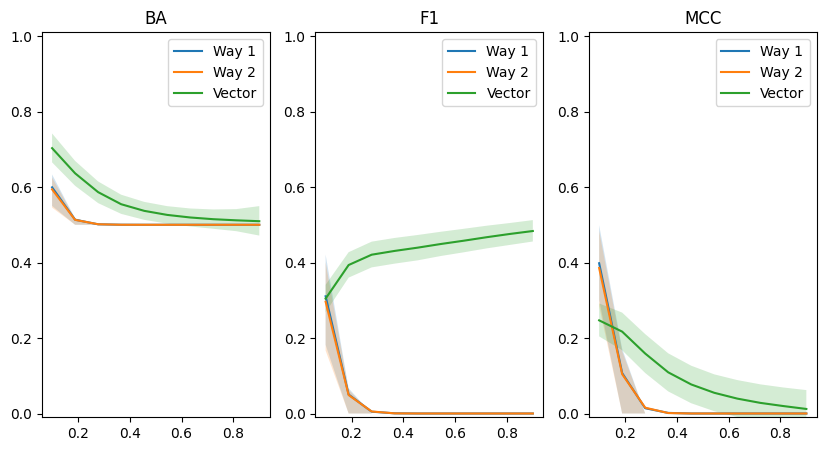

In [59]:
fig, axes = plt.subplots(1, 3)

drawGeneralMetrics(df_way0[df_way0.way == 0], axes, label='Way 1', x_axis='d')
drawGeneralMetrics(df_way1[df_way1.way == 1], axes, label='Way 2', x_axis='d')
drawGeneralMetrics(df_vec, axes, label='Vector', x_axis='d')

for ax in axes.flatten(): ax.legend()

fig.set_size_inches(10, 5)